In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random 
%matplotlib inline 

0
520
100


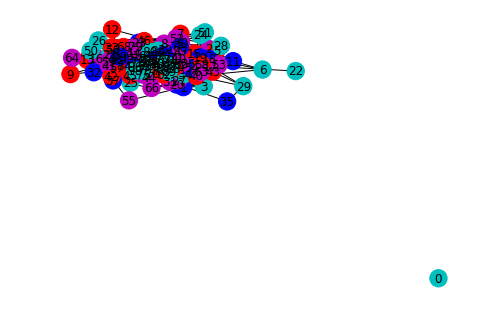

In [585]:
# Following code makes a coloured graph and connects the nodes


G = nx.Graph()
G.add_nodes_from(range(100))
colordict = dict()

for i in range(100):
    colordict[i] = {'color':0} # This holds the actual value for the color

color_map = [] # For show
    
for i in range(100):
    ran = random.random()
    if ran < 0.25:
        colordict[i]['color'] = 'c'
        color_map.append('c') 
    elif ran > 0.25 and ran < 0.5:
        colordict[i]['color'] = 'm'
        color_map.append('m')
    elif ran > 0.5 and ran < 0.75:
        colordict[i]['color'] = 'b'
        color_map.append('b')
    else:
        colordict[i]['color'] = 'r'
        color_map.append('r')
               
nx.set_node_attributes(G, colordict)

rand_pick = random.choice([5, 10, 15, 20, 25, 30, 35, 40])

for i in range(100):
    rnum = random.randrange(rand_pick) # Ik krijg het probleem dat ik toch rond een bepaalde connectivity ga zitten
    for count in range(rnum): # ik heb dit getal gekozen omdat groter te grote connectivity veroorzaakt
        randomnode = random.randrange(i, 100) # Ik heb nu vanaf i gedaan om duplicates te voorkomen.
        if randomnode!= i and G.nodes[i]['color'] != G.nodes[randomnode]['color']:
            ran = random.random()
            if ran > 0.5:
                G.add_edge(i,randomnode)
            
print(nx.number_of_selfloops(G)) # Check if everything went ok               
print(nx.number_of_edges(G)) # Total
print(nx.number_of_nodes(G))
#print(nx.average_node_connectivity(G)) # Average connectivity

nx.draw(G,node_color = color_map,with_labels = True)
plt.show()

100


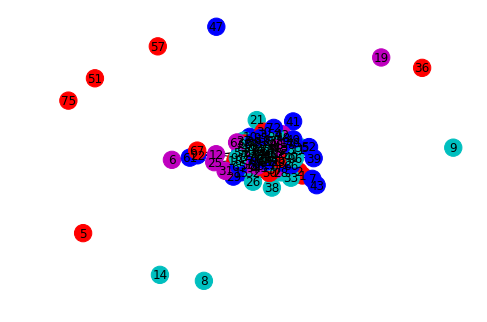

In [486]:
nx.draw(G,node_color = color_map,with_labels = True)
print(nx.number_of_nodes(G))
plt.show()

In [586]:
# Remove Subsumed Nodes
# subsumed is als subset is

to_be_removed = []
for n in G:
    n_list = [] 
    for i in nx.algorithms.descendants(G, n):
        n_list.append(i)
        
    for m in G:
        m_list = []
        if m != n:
            for j in nx.algorithms.descendants(G, m):
                m_list.append(j)

            if set(m_list).issubset(set(n_list)):
                if m not in to_be_removed:
                    to_be_removed.append(m)

for node in to_be_removed:
    G.remove_node(node)

99


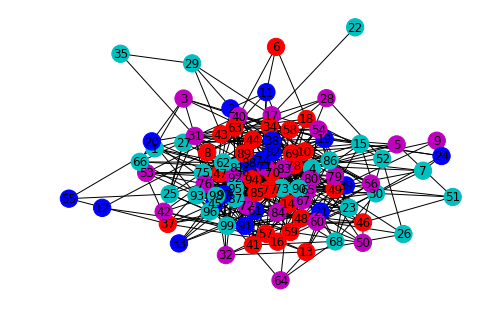

In [587]:
nx.draw(G,node_color = color_map,with_labels = True)
print(nx.number_of_nodes(G))
plt.show()

In [489]:
# Merge nodes that must have the same colour
to_be_merged = []
check_dupli = []
for n in G:
    n_list = [] 
    for i in nx.algorithms.descendants(G, n):
        n_list.append(i)
        
    for m in G:
        if G.has_edge(m,n):
            break # Ze mogen niet verbonden zijn met elkaar
        
        m_list = []
        if m != n and len(n_list) > 3:
            for j in nx.algorithms.descendants(G, m):
                m_list.append(j)

        if (set(m_list).intersection(set(n_list))) and G.node[n]['color'] == G.node[m]['color']:
            if m not in check_dupli and n not in check_dupli:
                check_dupli.append(m)
                check_dupli.append(n)
                to_be_merged.append([m, n])
 

for i in range(len(to_be_merged)):
    G = nx.contracted_nodes(G, to_be_merged[i][0], to_be_merged[i][1])

63


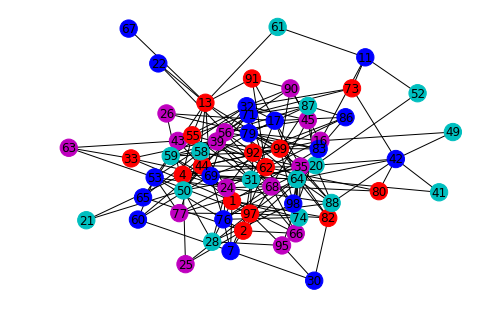

In [490]:
nx.draw(G,node_color = color_map,with_labels = True)
print(nx.number_of_nodes(G))
plt.show()

In [491]:
# Remove Underconstrained Nodes Now K = 4 so if it's connected to less than 4 colours
to_be_removed = []
for n in G:
    if len(G[n]) < 4:
        to_be_removed.append(n)

for node in to_be_removed:       
    G.remove_node(node) # G.remove_node(n)

50


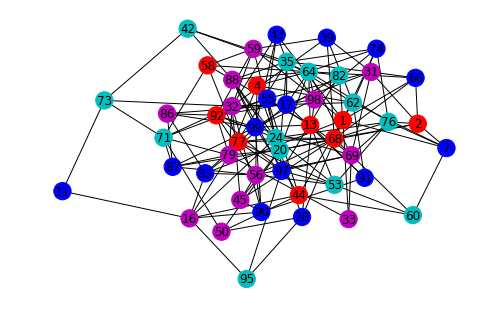

In [492]:
nx.draw(G,node_color = color_map,with_labels = True)
print(nx.number_of_nodes(G))
plt.show()

In [493]:
print(nx.average_node_connectivity(G)) # Average connectivity

5.320816326530612


In [ ]:
# for i in range(random.randrange(N)):
#     for j in range(random.randrange(N)):
#         if j != i and G.nodes[i]['color'] != G.nodes[j]['color']:
#             ran = random.random()
#             if ran > 0.5:
#                 G.add_edge(i,j)
                
# oude methode

0
237
100


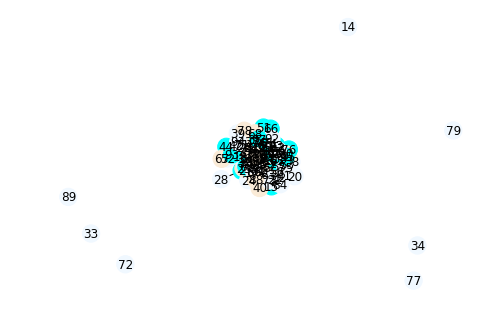

96


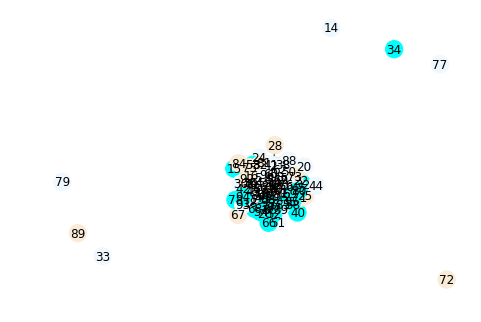

92


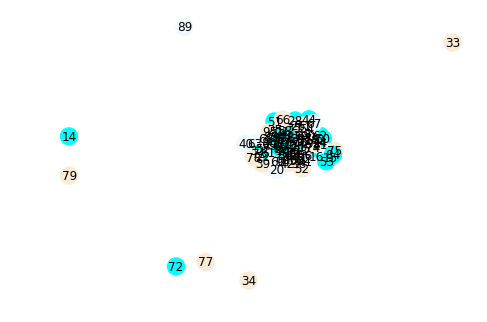

44


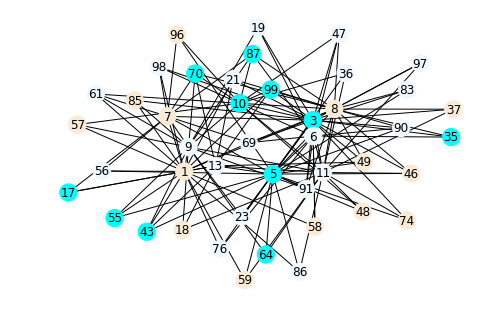

3.6659619450317127


In [4]:
import matplotlib.colors as mcolors

def subsumed(G, k):
    to_be_removed = []
    for n in G:
        n_list = [] 
        for i in G[n]:
            n_list.append(i)

        for m in G:
            m_list = []
            if m != n:
                for j in G[m]:
                    m_list.append(j)

                if set(m_list).issubset(set(n_list)) and len(m_list) > k:
                    if m not in to_be_removed:
                        to_be_removed.append(m)

    for node in to_be_removed:
        G.remove_node(node)
    
    return G
    
def symmetry(G):
    to_be_merged = []
    check_dupli = []
    for n in G:
        n_list = [] 
        for i in G[n]:
            n_list.append(i)

        for m in G:
            if G.has_edge(m,n):
                break # Ze mogen niet verbonden zijn met elkaar

            m_list = []
            if m != n and len(n_list) > 3:
                for j in G[m]:
                    m_list.append(j)

            if (set(m_list).intersection(set(n_list))):
                if m not in check_dupli and n not in check_dupli:
                    check_dupli.append(m)
                    check_dupli.append(n)
                    to_be_merged.append([m, n])

    for i in range(len(to_be_merged)):
        G = nx.contracted_nodes(G, to_be_merged[i][0], to_be_merged[i][1])
    
    return G

def undercon(G, k):
    to_be_removed = []
    for n in G:
        if len(G[n]) < k:
            to_be_removed.append(n)

    for node in to_be_removed:       
        G.remove_node(node) # G.remove_node(n)
    
    return G
    

def gen_random_graph(N, K):
    
    avail_colors = []
    for i in mcolors.CSS4_COLORS:
        avail_colors.append(i)
    
    G = nx.Graph()
    G.add_nodes_from(range(N))
    colordict = dict()

    for i in range(N):
        colordict[i] = {'color':0} # This holds the actual value for the color

    color_map = [] # For show 

    for i in range(N):
        num = random.randint(0, K-1)
        colordict[i]['color'] = avail_colors[num]
        color_map.append(avail_colors[num]) 

    nx.set_node_attributes(G, colordict)

    # VRAAG JELLE of dit wel goed is
    # VRAAG waarom randrange? 
    # VRAAG
    
    rand_pick = random.choice([4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40])
    Somenodes = random.randrange(N)
    
    for i in range(Somenodes):
        rnum = random.randrange(N)
        for count in range(rnum):
            randomnode = random.randrange(i, 100)
            if randomnode!= i and G.nodes[i]['color'] != G.nodes[randomnode]['color']:
                ran = random.random()
                if ran > 0.5:
                    G.add_edge(i,randomnode)

    print(nx.number_of_selfloops(G)) # Check if everything went ok               
    print(nx.number_of_edges(G)) # Total
    print(nx.number_of_nodes(G))
    #print(nx.average_node_connectivity(G)) # Average connectivity

    nx.draw(G,node_color = color_map,with_labels = True)
    plt.show()
    
    G = subsumed(G, K)
    nx.draw(G,node_color = color_map,with_labels = True)
    print(nx.number_of_nodes(G))
    plt.show()
    
    G = symmetry(G)
    nx.draw(G,node_color = color_map,with_labels = True)
    print(nx.number_of_nodes(G))
    plt.show()
    
    G = undercon(G, K)
    nx.draw(G,node_color = color_map,with_labels = True)
    print(nx.number_of_nodes(G))
    plt.show()

    return G

G = gen_random_graph(100, 3)
print(nx.average_node_connectivity(G)) # Average connectivity

9


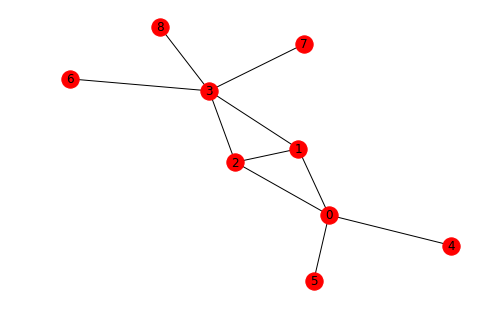

[1, 2, 4, 5]
[]
[0, 2, 3]
[1, 0, 3]
[1, 2, 6, 7, 8]
[]
[0]
[0]
[3]
[]
[]
[]
[3]
[]
[]
[]
[3]
[]
[]
[]
9


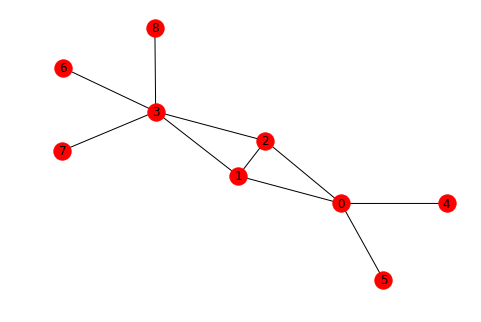

In [18]:
G = nx.Graph()
G.add_nodes_from(range(8))

G.add_edge(0, 1)
G.add_edge(1, 2)
G.add_edge(0, 2)
G.add_edge(1,3)
G.add_edge(2,3)
G.add_edge(0,4)
G.add_edge(0,5)
G.add_edge(3,6)
G.add_edge(3,7)
G.add_edge(3,8)

nx.draw(G,with_labels = True)
print(nx.number_of_nodes(G))
plt.show()

to_be_merged = []
check_dupli = []
for n in G:
    
    for clique in nx.cliques_containing_node(G, n):
        if len(clique) == 2:
            
    
    n_list = [] 
    for i in G[n]:
        n_list.append(i)

    for m in G:
        if G.has_edge(m,n):
            break # Ze mogen niet verbonden zijn met elkaar

        m_list = []
        if m != n and len(n_list) == 2:
            for j in G[m]:
                m_list.append(j)

        print(m_list)
        if len(m_list) == 2 and set(m_list).intersection(set(n_list)):
            if m not in check_dupli and n not in check_dupli:
                check_dupli.append(m)
                check_dupli.append(n)
                to_be_merged.append([m, n])

for i in range(len(to_be_merged)):
    G = nx.contracted_nodes(G, to_be_merged[i][0], to_be_merged[i][1])


nx.draw(G,with_labels = True)
print(nx.number_of_nodes(G))
plt.show()

8


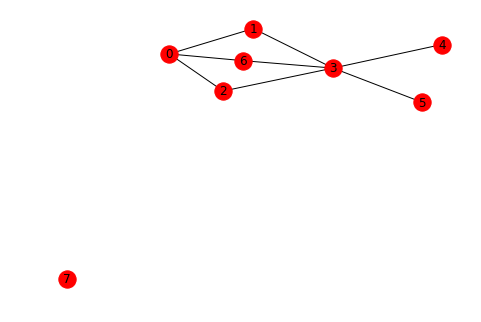

[1, 2, 6]
[0, 3]
[0, 3]
[1, 2, 4, 5, 6]
[3]
[3]
[0, 3]
[]
[0, 3]
[1, 2, 6]
[0, 3]
[1, 2, 4, 5, 6]
[3]
[3]
[0, 3]
[]
[0, 3]
[1, 2, 6]
[0, 3]
[1, 2, 4, 5, 6]
[3]
[3]
[0, 3]
[]
[1, 2, 4, 5, 6]
[1, 2, 6]
[0, 3]
[0, 3]
[3]
[3]
[0, 3]
[]
[3]
[1, 2, 6]
[0, 3]
[0, 3]
[1, 2, 4, 5, 6]
[3]
[0, 3]
[]
[3]
[1, 2, 6]
[0, 3]
[0, 3]
[1, 2, 4, 5, 6]
[3]
[0, 3]
[]
[0, 3]
[1, 2, 6]
[0, 3]
[0, 3]
[1, 2, 4, 5, 6]
[3]
[3]
[]
[]
[1, 2, 6]
[0, 3]
[0, 3]
[1, 2, 4, 5, 6]
[3]
[3]
[0, 3]
7


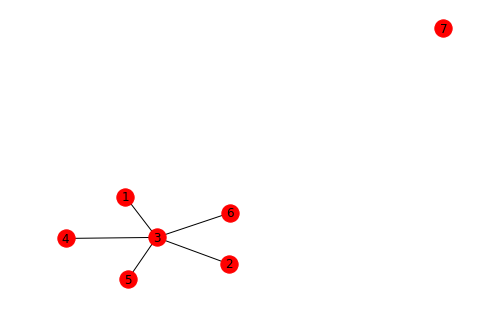

In [3]:
G = nx.Graph()
G.add_nodes_from(range(8))

G.add_edge(0, 1)
G.add_edge(0, 2)
G.add_edge(1,3)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(3,5)
G.add_edge(0,6)
G.add_edge(3,6)

nx.draw(G,with_labels = True)
print(nx.number_of_nodes(G))
plt.show()


to_be_removed = []
for n in G:
    n_list = [] 
    for i in G[n]:
        n_list.append(i)
        
    print(n_list)

    for m in G:
        m_list = []
        if m != n:
            for j in G[m]:
                m_list.append(j)
                
            print(m_list)

            if set(m_list).issubset(set(n_list)) and len(m_list) > 2:
                if m not in to_be_removed:
                    to_be_removed.append(m)

for node in to_be_removed:
    G.remove_node(node)


nx.draw(G,with_labels = True)
print(nx.number_of_nodes(G))
plt.show()

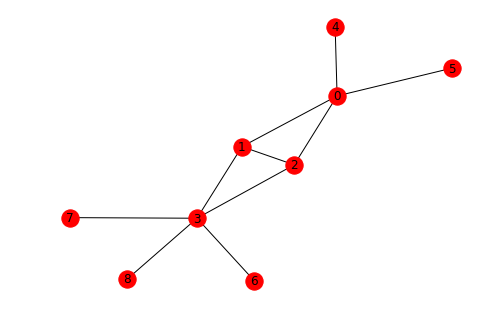

[0, 1, 2]
[3, 1, 2]
{0: 3, 1: 3, 2: 3, 3: 3, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2}


In [9]:
G = nx.Graph()
G.add_nodes_from(range(8))

G.add_edge(0, 1)
G.add_edge(1, 2)
G.add_edge(0, 2)
G.add_edge(1,3)
G.add_edge(2,3)
G.add_edge(0,4)
G.add_edge(0,5)
G.add_edge(3,6)
G.add_edge(3,7)
G.add_edge(3,8)

nx.draw(G,with_labels = True)
plt.show()

max_nu = 0
for i in nx.cliques_containing_node(G, nodes=1):
    print(i)

print(nx.node_clique_number(G))

In [1]:
G = nx.Graph()
G.add_nodes_from(range(8))

G.add_edge(0, 1)
G.add_edge(1, 2)
G.add_edge(0, 2)
G.add_edge(1,3)
G.add_edge(2,3)
G.add_edge(0,4)
G.add_edge(0,5)
G.add_edge(3,6)
G.add_edge(3,7)
G.add_edge(3,8)

nx.draw(G,with_labels = True)
plt.show()


to_be_merged = []

cliquedict = nx.node_clique_number(G)
geklijstje = []

for key in cliquedict: #Voor key 
    print(key)
    if cliquedict[key] == 3: #Als hij in een max clique zit
        for i in nx.cliques_containing_node(G, nodes=key): #Dan produceer al zijn cliques
            if len(i) == 3 and i not in geklijstje: # Sla alleen de max clique lijstjes op
                geklijstje.append(i)

                
for i in range(len(geklijstje)):
    print(lijstje)
    #if k == 3: dan dit anders iets anders
    if set(geklijstje[i]).intersection(set(geklijstje[i+1])):
        for a in (set(geklijstje[i]).intersection(set(geklijstje[i+1]))):
            geklijstje[i].remove(a)
            geklijstje[i+1].remove(a)
        to_be_merged.append([geklijstje[i][0], geklijstje[i+1][0]])
    if i == len(geklijstje)-2:
        break
    i+=2

                    

# for n in G:
#     n_list = [] 
#     for i in G[n]:
#         n_list.append(i)

#     for m in G:
#         if G.has_edge(m,n):
#             break # Ze mogen niet verbonden zijn met elkaar

#         m_list = []
#         if m != n and len(n_list) == 3:
#             for j in G[m]:
#                 m_list.append(j)

#         if len(m_list) == 3 and set(m_list).intersection(set(n_list)):
#             if m not in check_dupli and n not in check_dupli:
#                 check_dupli.append(m)
#                 check_dupli.append(n)
#                 to_be_merged.append([m, n])

for i in range(len(to_be_merged)):
    G = nx.contracted_nodes(G, to_be_merged[i][0], to_be_merged[i][1])
        
nx.draw(G,with_labels = True)
plt.show()

NameError: name 'nx' is not defined

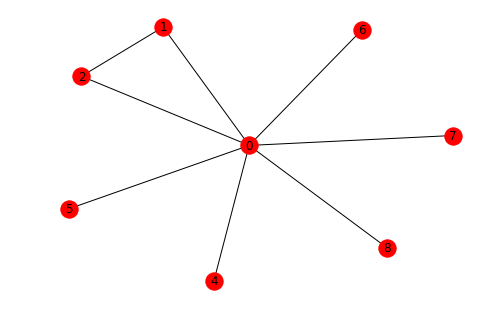

In [6]:
G = symmetry(G)
nx.draw(G,with_labels = True)
plt.show()

In [592]:
G=nx.read_edgelist("test.edgelist", nodetype=int)

85


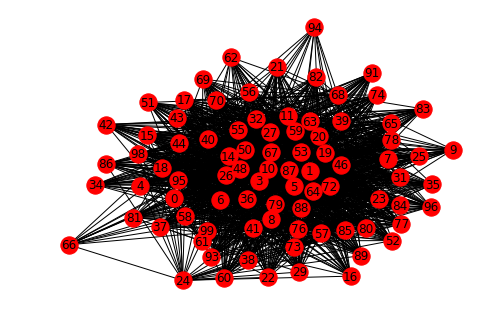

In [593]:
nx.draw(G,with_labels = True)
print(nx.number_of_nodes(G))
plt.show()